# DPAO model for N2O production

In [41]:
# package import
import pandas as pd
import numpy as np
import qsdsan as qs
import biosteam as bst

# set key variables
su = qs.sanunits

# Set up components
I ended up doing this manually rather than through a spreadsheet...I think I could revise my spreadsheet to make this work as an import though.

In [2]:
# water
H2O = qs.Component(ID='H2O', search_ID='H2O',
                    particle_size='Soluble', degradability='Undegradable',
                    organic=False)

# substrate 

S_NO3 = qs.Component('S_NO3', search_ID='Nitrate', measured_as='N', phase='l',
                    particle_size='Soluble', degradability='Undegradable',
                    organic=False)

S_NO2 = qs.Component('S_NO2', search_ID='PubChem=946', measured_as='N', phase='l',
                    particle_size='Soluble', degradability='Undegradable',
                    organic=False)

S_NO = qs.Component('S_NO', search_ID='Nitric oxide', measured_as='N', phase='l',
                    particle_size='Soluble', degradability='Undegradable',
                    organic=False)

S_N2O = qs.Component('S_N2O', search_ID='Nitrous oxide', measured_as='N', phase='g',
                    particle_size='Dissolved gas', degradability='Undegradable',
                    organic=False)

S_N2 = qs.Component('S_N2', search_ID='Nitrogen gas', measured_as='N', phase='g',
                    particle_size='Dissolved gas', degradability='Undegradable',
                    organic=False)

S_O2 = qs.Component('S_O2', search_ID='Oxygen', measured_as='', phase='g',
                    particle_size='Dissolved gas', degradability='Undegradable',
                    organic=False)

S_PO4 = qs.Component('S_PO4', search_ID='Orthophosphate', measured_as='P', phase='l',
                    particle_size='Soluble', degradability='Undegradable',
                    organic=False)


## C source
S_S = qs.Component('S_S', search_ID='Acetate', measured_as = 'COD', phase='l',
                     particle_size = 'Soluble', degradability = 'Readily',
                     organic = True)

# particulates
X_DPAO = qs.Component('X_DPAO', formula = 'C5H7O2N', measured_as = 'COD', phase='l',
                     particle_size = 'Particulate', degradability = 'Biological',
                     organic = True)

X_PHA = qs.Component('X_PHA', measured_as = 'COD', phase='l',
                     particle_size = 'Particulate', degradability = 'Slowly',
                     organic = True)

X_PP = qs.Component('X_PP', measured_as = 'P', phase='l',
                     particle_size = 'Particulate', degradability = 'Undegradable',
                     organic = False)

X_I = qs.Component('X_I', measured_as = 'COD', phase='l',
                     particle_size = 'Particulate', degradability = 'Undegradable',
                     organic = True)

# make into components obj
cmps = qs.Components((H2O, S_NO3, S_NO2, S_NO, S_N2O, S_N2, S_PO4, S_O2, S_S, X_DPAO, X_PHA, X_PP, X_I))

In [3]:
# fill in cmps with some additional data, filling in thermosteam blanks with properties of water

for i in cmps:
    if i is H2O:
        continue # continue means skip the rest of the codes and continue with the next one in the loop
    i.default()
    i.copy_models_from(H2O, names=('sigma', 'epsilon', 'kappa', 'V', 'Cn', 'mu'))

cmps.compile()

# set as default components for the rest of the file
qs.set_thermo(cmps) 

# Set up process
This is entirely coded in a spreadsheet. The only annoying part was typing in all the parameters manually.

In [4]:
# liu = qs.Processes.load_from_file(path = "test_process.tsv", 
#                             conserved_for=("C", "P"),
#                             parameters=("Y_PO4", "Y_PHA", "Y_DPAO_NOX", 
#                                         "i_P_BM", "i_P_XI", "f_I",
#                                          "q_PHA", "K_S_DPAO", "K_PP_DPAO", "q_PP", "K_PO4_PP", "K_PHA",
#                                          "K_MAX_DPAO", "K_iPP_DPAO", "K_DPAO_PO4", 
#                                          "mu_DPAO1", "mu_DPAO2", "mu_DPAO3", "mu_DPAO4",
#                                          "K_NO3", "K_NO2", "K_NO", "K_N2O",
#                                          "b_DPAO", "b_PP", "b_PHA", "K_NOX"),
#                             compile = True)

liu = qs.Processes.load_from_file(path = "test_process.tsv",
                                  compile = True)

In [5]:
# values taken directly from SI of Liu paper
liu.set_parameters(Y_PO4 = 0.3, Y_PHA = 0.2, Y_DPAO_NOX = 0.5,
                   i_P_BM = 0.02, i_P_XI = 0.01, f_I = 0.2,
                   q_PHA = 0.53, K_S_DPAO = 10, K_PP_DPAO = 0.05, 
                   q_PP = 0.0375, K_PO4_PP = 0.2, K_PHA = 0.1,
                   K_MAX_DPAO = 0.2, K_iPP_DPAO = 0.05, K_DPAO_PO4 = 0.05, 
                   mu_DPAO1 = 0.07, mu_DPAO2 = 0.019, mu_DPAO3 = 0.142, mu_DPAO4 = 0.018, 
                   K_NO3 = 0.251, K_NO2 = 0.81, K_NO = 0.0021, K_N2O = 0.0052, K_NOX = 0.5,
                   b_DPAO = 0.005, b_PP = 0.005, b_PHA = 0.005)

# check for stoichiometric matrix completion
liu.rate_equations

,rate_equation
anaerobic storage of X_PHA,0.53*S_S*X_PP/((0.05 + X_PP/X_D...
anoxic storage of X_PP on NO3-,0.0375*S_NO3*S_PO4*X_PHA*(0.2 -...
anoxic storage of X_PP on NO2-,0.0375*S_NO2*S_PO4*X_PHA*(0.2 -...
anoxic storage of X_PP on NO,0.0375*S_NO*S_PO4*X_PHA*(0.2 - ...
anoxic storage of X_PP on N2O,0.0375*S_N2O*S_PO4*X_PHA*(0.2 -...
anoxic growth on NO3-,0.07*S_NO3*S_PO4*X_PHA/((0.1 + ...
anoxic growth on NO2-,0.019*S_NO2*S_PO4*X_PHA/((0.1 +...
anoxic growth on NO,0.142*S_NO*S_PO4*X_PHA/((0.1 + ...
anoxic growth on N2O,0.018*S_N2O*S_PO4*X_PHA/((0.1 +...
anoxic endogenous respiration on NO3-,0.005*S_NO3*X_DPAO/(S_NO3 + 0.5)


# Setting up waste stream

In [25]:
inf = qs.WasteStream("inf")
inf.set_flow_by_concentration(flow_tot=100, 
                              concentrations={"S_S":100, "S_PO4":10}, 
                              units=("L/hr", "mg/L", "mg/L"))
inf.show()

nit = qs.WasteStream("nit", H2O = 10, S_NO2 = 0.5, units = "g/hr")
nit.show()

WasteStream: inf
phase: 'l', T: 298.15 K, P: 101325 Pa
flow (g/hr): H2O    9.97e+04
             S_PO4  1
             S_S    10
 WasteStream-specific properties:
  pH         : 7.0
  Alkalinity : 2.5 mg/L
  COD        : 100.0 mg/L
  TC         : 37.5 mg/L
  TOC        : 37.5 mg/L
  TP         : 10.0 mg/L
 Component concentrations (mg/L):
  H2O     997032.6
  S_PO4   10.0
  S_S     100.0
WasteStream: nit
phase: 'l', T: 298.15 K, P: 101325 Pa
flow (g/hr): H2O    10
             S_NO2  0.5
 WasteStream-specific properties:
  pH         : 7.0
  Alkalinity : 2.5 mg/L
  TN         : 48895.9 mg/L
 Component concentrations (mg/L):
  H2O     977917.2
  S_NO2   48895.9


/Users/mckenna/miniconda3/envs/qsdsan/lib/python3.11/site-packages/qsdsan/_sanstream.py:67: RuntimeWarning: <WasteStream: inf> has been replaced in registry
  super().__init__(ID=ID, flow=flow, phase=phase, T=T, P=P,
/Users/mckenna/miniconda3/envs/qsdsan/lib/python3.11/site-packages/qsdsan/_sanstream.py:67: RuntimeWarning: <WasteStream: nit> has been replaced in registry
  super().__init__(ID=ID, flow=flow, phase=phase, T=T, P=P,


# Setting up san units

/Users/mckenna/miniconda3/envs/qsdsan/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3508: RuntimeWarning: <CSTR: ana> has been replaced in registry
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/mckenna/miniconda3/envs/qsdsan/lib/python3.11/site-packages/biosteam/utils/piping.py:324: RuntimeWarning: <WasteStream: recycle> has been replaced in registry
  s = Stream(i, thermo=thermo)
/Users/mckenna/miniconda3/envs/qsdsan/lib/python3.11/site-packages/qsdsan/_sanunit.py:289: RuntimeWarning: <System: ana_dynmock> has been replaced in registry
  self._mock_dyn_sys = System(self.ID+'_dynmock', path=(self,))
/Users/mckenna/miniconda3/envs/qsdsan/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3508: RuntimeWarning: <CSTR: anx> has been replaced in registry
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/mckenna/miniconda3/envs/qsdsan/lib/python3.11/site-packages/qsdsan/_sanunit.py:289: RuntimeWarning: <System: anx_dynmock> has been replaced i

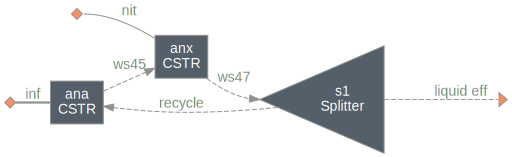

In [36]:
ana = su.CSTR("ana", ins = (inf, "recycle"), suspended_growth_model = liu, isdynamic = True)
ana.set_init_conc(X_DPAO = 1000, X_PHA = 500, X_PP = 500, X_I = 200)

anx = su.CSTR("anx", ins = (ana-0, nit), suspended_growth_model = liu, isdynamic = True)
anx.set_init_conc(X_DPAO = 1000, X_PHA = 500, X_PP = 500, X_I = 200)

split_dict = {i.ID: 0.9 if i.particle_size != 'Particulate' else 0 for i in cmps}
sep = su.Splitter("s1", ins = anx-0, outs = ("liquid_eff", 1-ana), split = split_dict)

test_sys = bst.System("test_sys", path = (ana, anx, sep), recycle = sep - 1)

test_sys.diagram()

In [37]:
liquid_eff = test_sys.flowsheet.stream.liquid_eff
ml_ana = test_sys.flowsheet.unit.ana
ml_anx = test_sys.flowsheet.unit.anx

test_sys.set_dynamic_tracker(liquid_eff, ml_ana, ml_anx)

In [42]:
test_sys.simulate(t_span = (0, 20), 
                  t_eval = np.arange(0, 21, 1))

In [43]:
test_sys.scope.export("test_series.csv")